In [1]:
import matplotlib.pyplot as plt
import requests, json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.transforms import IdentityTransform
import matplotlib.transforms as transforms

In [2]:
dict_cell_line_mouse = {'C2C12': 'Myoblast cell line derived from thigh muscle of C3H mice after crush injury',
 'CH12.LX': 'B-cell lymphoma (GM12878 analog)',
 'G1E-ER4': 'Gata1 restored erythroid cells, differentiation induced by estradiol (E2)',
 'G1E': 'Gata1- erythroid progenitor',
 'MEL': 'Leukemia (K562 analog)',
 'ES-E14': 'mouse embryonic stem cell line E14',
 'ES-Bruce4': 'mouse embryonic stem cells',
 'E14TG2a.4': 'mouse embryonic stem cell line E14',
 'Patski': 'Female mouse hybrid Embryo Spontaneously immortalized cell line'}

In [3]:
dict_cell_line_human = {'K562': 'lymphoblast cells from the bone marrow of a 53-year-old chronic myelogenous leukemia patient',
 'H1': 'human embryonic stem cell line',
 'OCI-LY7': 'human B-cell non-Hodgkin lymphoma cell line',
 'A549': ' adenocarcinomic human alveolar basal epithelial cells',
 'HepG2': 'epithelial-like morphology from a hepatocellular carcinoma',
 'A673': ' polygonal morphology that was isolated from the muscle',
 'HCT116': 'colon of an adult male with colon cancer',
 'Caco-2': 'epithelial cells from colon tissue from a male with colorectal adenocarcinoma',
 'PC-9': 'Derived from a human adenocarcinoma from lung tissue which remains undifferentiated',
 'SK-N-SH': 'neuroblastoma cell line that displays epithelial morphology and grows in adherent culture',
 'GM12878': '',
 'HEK293': 'cell line from a spontaneously miscarried or aborted fetus or human embryonic kidney cells',
 'NCI-H929': ' B lymphocytes isolated from a malignant effusion in a 62-year-old, White, female plasmacytoma myeloma patient',
 'BJ': 'skin fibroblast, The line was established from skin taken from normal foreskin',
 'MCF-7': ' breast cancer cell line',
 'U2OS': ' bone tissue, disease osteosarcoma',
 'BE2C': ' bone marrow disease disseminated neuroblastoma after repeated courses of chemotherapy and radiotherapy',
 'BLaER1': ' B-cell precursor leukemia cell line',
 'HL-60': ' leukemia cell line',
 'IMR-90': 'fibroblasts isolated from normal lung tissue',
 'Panc1': 'epithelial morphology from the pancreatic duct male with epithelioid carcinoma',
 'GM23248': 'Healthy Collection, Arm Skin, Fibroblast',
 'HeLa-S3': 'Uterus; Cervix, disease Adenocarcinoma',
 'WERI-Rb-1': 'Tissue: Eye, Retina; Disease: Retinoblastoma',
 'H9': 'Cell type: cutaneous T lymphocyte; Morphology:lymphoblast ; Disease: Lymphoma',
 'Karpas-422': 'Human B cell non-Hodgkin lymphoma ',
 'OCI-LY1': 'established from the bone marrow of a 44-year-old man with B-cell Non-Hodgkin lymphoma (B-NHL; diffuse large cell)',
 'SK-N-MC': 'bone marrow of a 44-year-old man with B-cell non-Hodgkin lymphoma',
 'GM06990': 'B-lymphocyte, lymphoblastoid, treatment: Epstein-Barr Virus transformed',
 'Loucy': 'peripheral blood of a patient with T-cell acute lymphoblastic leukemia, obtained two months prior to death',
 'MG63': 'fibroblast morphology from bon, disease: osteosarcoma',
 'NT2/D1': 'tissue: testis; disase: carcinoma, malignant pluripotent embryonal',
 'PC-3': 'Tissue: Prostate ; Disease:Adenocarcinoma; Grade IV',
 'SJSA1': 'Morphology: fibroblast; Tissue: Bone; Disease: Osteosarcoma',
 'SU-DHL-6': 'disease: large cell lymphoma',
 'MM.1S': 'peripheral blood of a multiple myeloma patient resistant to steroid-based therapy',
 'SJCRH30': 'fibroblast-like morphology; Tissue: muscle; disease: rhabdomyosarcoma',
 'KOPT-K1': 'Childhood T acute lymphoblastic leukemia',
 'DND-41': 'peripheral blood, T-acute lymphoblastic leukemia',
 'iPS DF 19.11': 'pluripotent stem cell line, from foreskin fibroblasts',
 'iPS-18a': 'stem cell line from dermal fibroblasts ratomas',
 'HUES48': 'embryonic stem cell line with a normal 46XX karyotype, from human blastocysts',
 'OCI-LY3': 'Immortalized diffuse large B cell lymphoma cell line',
 'HUES64': 'Blastocyst stage, Embryonic stem cell',
 'ES-I3': 'stem cell line from donated blastocys',
 'iPS DF 6.9': 'pluripotent stem cell line from foreskin fibroblasts',
 'H7': 'undifferentiated embryonic stem cells',
 'UCSF-4': 'Embryonic undifferentiated stem cell line, from a healthy female donor',
 'HUES6': 'embryonic stem cell line, derived from human blastocysts',
 'iPS-20b': 'Human induced stem cell line derived from dermal fibroblasts',
 'KMS-11': 'multiple myeloma',
 'DOHH2': ' pleural effusion of a man with refractory immunoblastic B cell lymphoma',
 'RWPE2': 'Morphology: epithelial; Tissue: Prostate; Disease: Healthy',
 'HAP-1': 'near-haploid, from the male chronic myelogenous leukemia (CML) cell line KBM-7; fibroblast-like morphology',
 'iPS-18c': 'stem cell line from dermal fibroblasts',
 'iPS-15b': 'stem cell line from dermal fibroblasts',
 'AG04450': 'minced lung tissue from a therapeutically aborted fetus, cell morphology fibroblast-like',
 'ACC112': 'adenoid cystic carcinoma cell line',
 'GM23338': 'pluripotent stem cell line',
 'RWPE1': 'Epithelial cells from the peripheral zone of a histologically normal adult human prostate ',
 '22Rv1': 'Morphology: epithelial; Tissue: Prostate; Disease: Carcinoma',
 'C4-2B': 'epithelial-like morphology, prostate, White male with prostate cancer',
 'VCaP': 'Morphology: epithelial; Tissue: Prostate ; Disease: Cancer',                  
 'AG04449': 'Fibroblast of skin (Buttock), male',
 'AG09309': 'Fibroblast of skin (Toe), Female 21 years old',
 'AG09319': 'Oral cavity female 24 years old',
 'AG10803': 'Fibroblast of skin (Abdomen skin), male 21 years old',
 'GM08714': 'Disease: ICF syndrome, Derived: Peripheral blood, Transformed cell line, female age 1',
 'GM12864': 'Derived: Peripheral blood, Transformed cell line, male',
 'GM12865': 'Derived: Peripheral blood, Transformed cell line, female',
 'GM12866': 'Derived: Peripheral blood, Transformed cell line, male',
 'GM12875': 'Derived: Peripheral blood, Transformed cell line, female adult',
 'HFF-Myc': 'Fibroblast of foreskin (foreskin), Male',
 'Jurkat, Clone E6-1': 'Peripheral blood, T-cell, male age 14, Childhood T acute lymphoblastic leukemia',
 'LNCaP clone FGC': 'Disease: Prostate carcinoma, Tissue: Left supraclavicular lymph node, male age 50',
 'NB4': 'Bone marrow, Disease: Acute promyelocytic leukemia, female age 23',
 'WI38': 'Fibroblast of lung (Fetal lung), female',
 'iPS-11a': 'Fibroblast of skin, male age 36, Induced pluripotent stem cell'}

In [4]:
headers = {'accept': 'application/json'}
link_dict = {
             #("Mus Musculus", "cell line"): ( (5,3),'https://www.encodeproject.org/search/?type=Experiment&assay_title=total+RNA-seq&assay_title=polyA+plus+RNA-seq&replicates.library.biosample.donor.organism.scientific_name=Mus+musculus&assay_title=Histone+ChIP-seq&assay_title=ATAC-seq&assay_title=DNase-seq&limit=200&biosample_ontology.classification=cell+line'),
             ("Mus Musculus", "tissue"): ( (9,3),"https://www.encodeproject.org/search/?type=Experiment&assay_title=total+RNA-seq&assay_title=polyA+plus+RNA-seq&replicates.library.biosample.donor.organism.scientific_name=Mus+musculus&assay_title=Histone+ChIP-seq&assay_title=ATAC-seq&assay_title=DNase-seq&limit=1500&biosample_ontology.classification=tissue"),
             #("Mus Musculus", "primary cell"): ( (4,3),"https://www.encodeproject.org/search/?type=Experiment&assay_title=total+RNA-seq&assay_title=polyA+plus+RNA-seq&replicates.library.biosample.donor.organism.scientific_name=Mus+musculus&assay_title=Histone+ChIP-seq&assay_title=ATAC-seq&assay_title=DNase-seq&limit=250&biosample_ontology.classification=primary+cell"),
             #("Homo Sapiens", "cell line"): ( (24,10),'https://www.encodeproject.org/search/?type=Experiment&assay_title=total+RNA-seq&assay_title=polyA+plus+RNA-seq&assay_title=Histone+ChIP-seq&assay_title=ATAC-seq&assay_title=DNase-seq&limit=1600&biosample_ontology.classification=cell+line&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens'),
             #("Homo Sapiens", "tissue"): ( (24,3),'https://www.encodeproject.org/search/?type=Experiment&assay_title=total+RNA-seq&assay_title=polyA+plus+RNA-seq&assay_title=Histone+ChIP-seq&assay_title=ATAC-seq&assay_title=DNase-seq&limit=3000&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&biosample_ontology.classification=tissue'), 
             #("Homo Sapiens", "primary cell"): ((23,5) ,'https://www.encodeproject.org/search/?type=Experiment&assay_title=total+RNA-seq&assay_title=polyA+plus+RNA-seq&assay_title=Histone+ChIP-seq&assay_title=ATAC-seq&assay_title=DNase-seq&limit=1500&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&biosample_ontology.classification=primary+cell')
            }


before deletion: 26


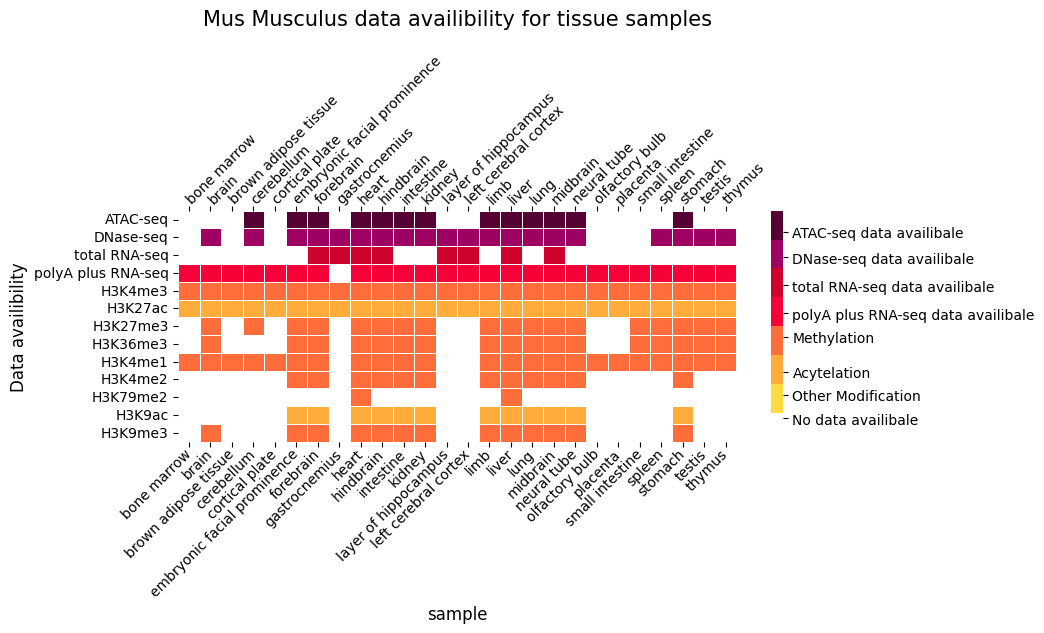

In [5]:
for i in range(len(link_dict)):
    key = list(link_dict.keys())[i]
    organism = key[0]
    sample_type = key[1]
    fig_size = link_dict[key][0]
    url = link_dict[key][1]
    
    response = requests.get(url, headers=headers)
    json_encode = response.json()
    
    # finding out which unique modifications are in the data
    sample_HM = []
    sample_assay = []
    HMs = ["ATAC-seq", "DNase-seq", "total RNA-seq", "polyA plus RNA-seq"]
    samples = []
    for entry in json_encode['@graph']:
        assay = entry["assay_title"]
        cell_line = entry["biosample_ontology"]["term_name"]
        if assay == "Histone ChIP-seq":
            HM = entry["target"]["label"]
            sample_HM.append((cell_line, HM))
            samples.append(cell_line)
            HMs.append(HM)
        else:
            sample_assay.append((cell_line, assay))

    # assigning values to HMs
    df_mus = pd.DataFrame(0, np.unique(np.array(HMs)), np.unique(np.array(samples)))
    for s_HM in sample_HM:
        sample = s_HM[0]
        HM = s_HM[1]
        if "me" in HM:
            df_mus.loc[HM, sample] = 0.4
        else:
            if "ac" in HM:
                df_mus.loc[HM, sample] = 0.25
            else:
                df_mus.loc[HM, sample] = 0.1

    print("before deletion: " + str(df_mus.shape[1]))
    # delete all samples with only one mod
    #df_mus = df_mus.drop(df_mus.columns[(df_mus == 0.4).sum() == 1], axis=1)
    #df_mus = df_mus.drop(df_mus.columns[((df_mus == 0.4).sum() == 0) & ((df_mus == 0.25).sum() == 1)], axis=1)
    
    # sort all maybes (samples with only met) to the right
    only_met = df_mus.columns[(~df_mus.isin([0.25, 0.1])).all()]
    df_mus = pd.concat([df_mus.drop(only_met, axis=1), df_mus[only_met]], axis=1)

    # sort so that H3K27ac and H3K4me3 are always on top
    rows = df_mus.index.values
    for mod in ["H3K27ac", "H3K4me3"]:
        if mod in rows:
            rows = rows[rows !=mod]
            rows = np.insert(np.array(rows), 2, mod)
    df_mus = df_mus.reindex(rows)

    # asigning protocols
    for s_a in sample_assay:
        sample = s_a[0]
        assay = s_a[1]
        if sample in df_mus.columns:
            if assay == "ATAC-seq":
                df_mus.loc[assay, sample] = 0.99
            if assay == "DNase-seq":
                df_mus.loc[assay, sample] = 0.8
            if assay == "total RNA-seq":
                df_mus.loc[assay, sample] = 0.7
            if assay == "polyA plus RNA-seq":
                df_mus.loc[assay, sample] = 0.5
                
    # sort so that both RNA-seqs are always on top
    rows = df_mus.index.values
    for mod in ["polyA plus RNA-seq", "total RNA-seq"]:
        if mod in rows:
            rows = rows[rows != mod]
            rows = np.insert(np.array(rows), 2, mod)
    df_mus = df_mus.reindex(rows)
    
    # delete all samples with no RNA-seq data and remove then empty rows
    #df_mus = df_mus.drop(df_mus.columns[((df_mus == 0.5).sum() == 0) & ((df_mus == 0.7).sum() == 0)], axis=1)
    #df_mus = df_mus[(df_mus != 0).any(axis=1)]
    #print("after deletion: " + str(df_mus.shape[1]) )
    
    if sample_type == "cell line":
        if organism == "Mus Musculus":
            cell_line_info_text = ""
            for key in df_mus.columns:
                if key in dict_cell_line_mouse:
                    cell_line_info_text+= key + ": " + dict_cell_line_mouse[key] + "\n"
                else:
                    cell_line_info_text+= key + "\n"

        if organism == "Homo Sapiens":
            cell_line_info_text_1 = ""
            cell_line_info_text_2 = ""
            for i in range(len(df_mus.columns)):
                key = df_mus.columns[i]
                if i < int(len(df_mus.columns)/2):
                    if key in dict_cell_line_human:
                        cell_line_info_text_1+= key + ": " + dict_cell_line_human[key] + "\n"
                    else:
                        cell_line_info_text_1+= key + "\n"
                        print(key)
                else:
                    if key in dict_cell_line_human:
                        cell_line_info_text_2+= key + ": " + dict_cell_line_human[key] + "\n"
                    else:
                        cell_line_info_text_2+= key + "\n"
                        print(key)
                
    myColors = ("#ffffff", "#FFDC3D", "#FFAC3B", "#FF6E3A", "#F60239", "#CD022D", "#9F0162", "#560133")
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    plt.figure(figsize = fig_size)
    ax = sns.heatmap(df_mus, cmap=cmap, linewidth=.5, xticklabels=True, yticklabels=True)
    # Manually specify colorbar labelling after it's been generated
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([ 0.1, 0.2, 0.3, 0.45, 0.55, 0.67, 0.79, 0.9])
    colorbar.set_ticklabels(["No data availibale", 'Other Modification', 'Acytelation', 'Methylation', 'polyA plus RNA-seq data availibale', 'total RNA-seq data availibale' ,'DNase-seq data availibale', 'ATAC-seq data availibale'])

    plt.title(organism + ' data availibility for ' + sample_type + ' samples', fontsize = 15, pad=20) 
    plt.ylabel('Data availibility', fontsize = 12) 
    plt.xlabel('sample', fontsize = 12)

    ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
    plt.setp([tick.label1 for tick in ax.xaxis.get_major_ticks()], rotation=45,
             ha="right", va="center", rotation_mode="anchor")
    plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=45,
             ha="left", va="center",rotation_mode="anchor")
    
    if sample_type == "cell line":
        if organism == "Mus Musculus":
            plt.text(-3, 35, cell_line_info_text)
        if organism == "Homo Sapiens":
            plt.text(-3, 80, cell_line_info_text_1)
            plt.text(50, 80, cell_line_info_text_2)
            
    plt.show()
    
    #print(df_mus.columns)
    